# Phase 3 Artist Genre Prediction

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 200)
pd.options.display.max_colwidth = 100



from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
plt.style.use('seaborn')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE, RFECV

## Column Descriptions: 

**Acousticness**: The relative metric of the track being acoustic\
**Danceability**: The relative measurement of the track being danceable\
**Duration_MS**: The duration length of track (in ms)\
**Energy**: The energy of the track\
**Instrumentalness**: The relative ratio of the track being instrumental\
**Liveness**: The relative duration of the track sounding as a live performance\
**Loudness**: Relative loudness of the track in the typical range [-60, 0] in decibel (dB)\
**Speechiness**: The relative length of the track containing any kind of human voice\
**Tempo**: The tempo of the track in Beat Per Minute (BPM)\
**Valence**: The positivity of the track\
**Popularity**: The popularity of the song lately, default country = US\
**Key**: The primary key of the track encoded as integers in between 0 and 11\
**Mode**: The binary value representing whether the track starts with a major (1) chord progression or not (0)\
**Count**: The number of tracks from the original dataset, produced by the given artist (Dropped)


## Data Cleaning

In [2]:
df = pd.read_csv('data/data_w_genres.csv')
df

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.000000,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,38.200000,5,1,10,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,31.538462,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.571429,0,1,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.407407,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat"" 1991 London Cast",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,42.000000,5,1,7,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32534,김효근,0.939000,0.174000,341821.000000,0.321000,0.756000,0.695000,-13.411000,0.042200,138.300000,0.055400,0.000000,3,1,1,[]
32535,나율,0.717000,0.591500,241281.500000,0.473500,0.000000,0.105000,-6.588500,0.053700,107.599000,0.507500,16.000000,1,1,4,[]
32536,미스티,0.416000,0.686000,216715.000000,0.822000,0.000000,0.110000,-6.300000,0.080200,122.047000,0.625000,0.000000,5,0,2,[]
32537,시온 Zion & 한해 Hanhae of 팬텀 Phantom,0.288000,0.739000,242480.000000,0.475000,0.000000,0.075700,-8.920000,0.379000,81.490000,0.800000,8.000000,2,0,2,[]


### Removed all the empty genres

In [3]:
df = df.loc[df['genres'] != '[]']

In [4]:
df = df.reset_index()

In [5]:
df = df.drop('index',axis=1)

In [6]:
df.shape

(18976, 16)

### First Iteration: Map data to Rap or country ###

In [7]:
df['rap'] = 0
df['country'] = 0
df['classical'] = 0
df['jazz'] = 0

In [8]:
count=0

for songs in df['genres']:
    song1 = songs.split(', ')
    for song in song1:
        if ' rap' in song and "trap" not in song and "country rap" not in song:
            df['rap'][count] += 1
        if "country" in song:
            df['country'][count] += 1
        if "classical" in song:
            df['classical'][count]+=1
        if "jazz" in song and 'jazz rap' not in song and 'classical jazz' not in song and 'country jazz' not in song:
            df['jazz'][count]+=1
    count+=1

<ipython-input-8-365487a95f8b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rap'][count] += 1
<ipython-input-8-365487a95f8b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'][count] += 1
<ipython-input-8-365487a95f8b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['classical'][count]+=1
<ipython-input-8-365487a95f8b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

### Further Categorize Rap or country

In [9]:
#rap 0 country 1 rock 2 pop 3

In [10]:
# conditons =  [
#                 ((df['rap'] > df['country']) & (df['rap'] > df['classical'])& (df['rap'] > df['jazz'])),
#                 ((df['country'] > df['rap']) &  (df['country'] > df['classical']) &  (df['country'] > df['jazz'])),
#                 ((df['classical'] > df['rap']) &  (df['classical'] > df['country'])&  (df['classical'] > df['jazz'])),
#                 ((df['jazz'] > df['rap']) &  (df['jazz'] > df['country'])&  (df['jazz'] > df['classical']))
#              ]

# choices = ['rap',
#            'country',
#            'classical',
#            'jazz'
           
# ]

# df['clean_genres'] = np.select(conditons, choices)

In [11]:
df = df[(df.rap >= 1) | (df.country >= 1) | (df.classical >= 1) | (df.jazz >= 1)]

In [12]:
df['clean_genres'] = df[['rap','country','classical','jazz']].idxmax(axis=1)

In [13]:
df['clean_genres'].value_counts()

classical    1231
jazz         1164
rap          1133
country      1007
Name: clean_genres, dtype: int64

In [14]:
df['clean_genres'].value_counts()

classical    1231
jazz         1164
rap          1133
country      1007
Name: clean_genres, dtype: int64

In [15]:
df.iloc[257]['clean_genres']

'classical'

In [16]:
df['classical'].value_counts()

0    3294
1     904
2     255
3      64
4      16
5       2
Name: classical, dtype: int64

In [17]:
df[
    (df['classical'] >= 1) & (df['country'] >= 1) &
    ((df['country'] == df['classical']))
    ][['artists','genres', 'country', "classical", 'clean_genres']].sort_values(by=['classical'], ascending=False)

,artists,genres,country,classical,clean_genres


In [18]:
df[
    (df['classical'] >= 1) & (df['rap'] >= 1) &
    ((df['rap'] == df['classical']))
    ][['artists','genres', 'rap', "classical", 'clean_genres']].sort_values(by=['rap'], ascending=False)

,artists,genres,rap,classical,clean_genres


In [19]:
df[
    (df['country'] >= 1) & (df['rap'] >= 1) &
    ((df['country'] == df['rap']))
    ][['artists','genres', 'rap', "country", 'clean_genres']].sort_values(by=['rap'], ascending=False)

,artists,genres,rap,country,clean_genres
257,Adam Calhoun,"['country rap', 'military rap', 'redneck']",1,1,rap
13913,Rittz,"['atl hip hop', 'country rap', 'pop rap', 'southern hip hop']",1,1,rap


In [20]:
df[
    (df['jazz'] >= 1) & (df['rap'] >= 1) &
    ((df['jazz'] == df['rap']))
    ][['artists','genres', 'rap', "jazz", 'clean_genres']].sort_values(by=['rap'], ascending=False)

,artists,genres,rap,jazz,clean_genres
17827,Us3,"['electronica', 'jazz rap', 'nu jazz']",1,1,rap


In [21]:
df[
    (df['jazz'] >= 1) & (df['country'] >= 1) &
    ((df['jazz'] == df['country']))
    ][['artists','genres', 'country', "jazz", 'clean_genres']].sort_values(by=['country'], ascending=False)

,artists,genres,country,jazz,clean_genres
2016,"Blood, Sweat & Tears","['album rock', 'art rock', 'blues rock', 'brill building pop', 'classic rock', 'country rock', '...",1,1,country
4641,Dr. John,"['blues', 'blues rock', 'classic rock', 'country rock', 'electric blues', 'folk rock', 'funk', '...",1,1,country
7858,Jeff Beck,"['album rock', 'art rock', 'blues', 'blues rock', 'british blues', 'classic rock', 'country rock...",1,1,country
9923,Lonnie Johnson,"['acoustic blues', 'blues', 'country blues', 'jazz blues', 'louisiana blues', 'memphis blues', '...",1,1,country


In [22]:
df[
    (df['jazz'] >= 1) & (df['classical'] >= 1) &
    ((df['jazz'] == df['classical']))
    ][['artists','genres', 'classical', "jazz", 'clean_genres']].sort_values(by=['classical'], ascending=False)

,artists,genres,classical,jazz,clean_genres
4954,Egberto Gismonti,"['bossa nova', 'brazilian contemporary classical', 'brazilian jazz', 'ecm-style jazz', 'latin cl...",2,2,classical
938,Anja Lechner,"['classical cello', 'ecm-style jazz']",1,1,classical
1677,Benny Andersson,"['classic swedish pop', 'neo-classical', 'swedish jazz']",1,1,classical
8049,Jimmy Hamilton,"['classical clarinet', 'jazz clarinet']",1,1,classical
9799,Liquid Tension Experiment,"['instrumental rock', 'jazz metal', 'neo classical metal', 'progressive metal', 'shred']",1,1,classical
11796,Münir Nurettin Selçuk,"['turkish classical', 'turkish jazz']",1,1,classical
14401,Safiye Ayla,"['turkish classical', 'turkish jazz']",1,1,classical
15537,Steve Morse,"['instrumental rock', 'jazz fusion', 'neo classical metal', 'shred']",1,1,classical
16049,Tension,"['instrumental rock', 'jazz metal', 'neo classical metal', 'progressive metal', 'shred']",1,1,classical


In [23]:
df['clean_genres'][257] = "country"
df['clean_genres'][13913] = "rap"
df['clean_genres'][17827] = "rap"
df['clean_genres'][2016] = "country"
df['clean_genres'][4641] = "jazz"
df['clean_genres'][7858] = "jazz"
df['clean_genres'][9923] = "jazz"
df['clean_genres'][4954] = "jazz"
df['clean_genres'][938] = "classical"
df['clean_genres'][1677] = "classical"
df['clean_genres'][8049] = "jazz"
df['clean_genres'][9799] = "jazz"
df['clean_genres'][11796] = "classical"
df['clean_genres'][14401] = "classical"
df['clean_genres'][15537] = "jazz"
df['clean_genres'][16049] = "jazz"



<ipython-input-23-b2489cf39a32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_genres'][257] = "country"
<ipython-input-23-b2489cf39a32>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_genres'][13913] = "rap"
<ipython-input-23-b2489cf39a32>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_genres'][17827] = "rap"
<ipython-input-23-b2489cf39a32>:4: SettingWithCopyWarning: 
A value is trying to be set on a

In [24]:
df['clean_genres'].value_counts()

classical    1226
jazz         1172
rap          1132
country      1005
Name: clean_genres, dtype: int64

In [25]:
df[df.country > 0 ].shape

(1012, 21)

In [26]:
df[df.rap > 0 ].shape

(1135, 21)

In [27]:
df['duration_sec'] = round(df['duration_ms']/1000,2)

## Basic EDA

In [28]:
df.clean_genres.value_counts()

classical    1226
jazz         1172
rap          1132
country      1005
Name: clean_genres, dtype: int64

In [29]:
genres_df = df.copy()

In [30]:
genres_df.reset_index(inplace=True)

In [31]:
genres_df = genres_df.drop('index', axis=1)

In [32]:
## dropped count because it is the count of songs that the artist has in the dataset
genres_df.drop('count', axis=1, inplace=True)

In [33]:
genres_df

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,genres,rap,country,classical,jazz,clean_genres,duration_sec
0,$NOT,0.458167,0.826667,146886.333333,0.518667,7.108333e-06,0.201683,-8.713167,0.272550,90.728833,0.426750,74.166667,0,1,"['florida rap', 'underground hip hop', 'vapor trap']",1,0,0,0,rap,146.89
1,$atori Zoom,0.239000,0.883000,141519.000000,0.625000,0.000000e+00,0.076500,-4.098000,0.245000,126.677000,0.871000,69.000000,6,1,"['dark trap', 'meme rap']",1,0,0,0,rap,141.52
2,$uicideBoy$,0.154637,0.778551,149915.289855,0.625870,2.472048e-02,0.209223,-6.553899,0.149986,117.679087,0.242772,65.333333,1,1,"['dark trap', 'new orleans rap', 'underground hip hop']",1,0,0,0,rap,149.92
3,03 Greedo,0.144920,0.644600,244528.800000,0.526000,8.000000e-07,0.104660,-9.282200,0.066560,83.897800,0.356800,66.000000,3,0,"['cali rap', 'melodic rap', 'trap', 'underground hip hop', 'vapor trap']",2,0,0,0,rap,244.53
4,070 Shake,0.011400,0.696000,398106.000000,0.667000,0.000000e+00,0.181000,-7.665000,0.040700,121.932000,0.287000,62.000000,0,0,"['alternative r&b', 'new jersey rap']",1,0,0,0,rap,398.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4530,セキトオ・シゲオ,0.611615,0.425692,235317.538462,0.297062,4.252538e-01,0.091523,-13.489231,0.033900,124.615000,0.312800,31.153846,9,1,['classic japanese jazz'],0,0,0,1,jazz,235.32
4531,猪俣猛,0.870000,0.457000,395067.000000,0.115000,8.150000e-01,0.082400,-27.753000,0.061000,92.571000,0.162000,27.000000,1,1,['classic japanese jazz'],0,0,0,1,jazz,395.07
4532,福居良,0.782500,0.463167,413395.666667,0.371000,3.808683e-01,0.163417,-12.028500,0.037417,97.863500,0.265217,42.166667,7,0,"['classic japanese jazz', 'japanese jazz']",0,0,0,2,jazz,413.40
4533,笠井 紀美子,0.085600,0.614000,428427.000000,0.761000,6.180000e-01,0.063000,-14.346000,0.047600,122.889000,0.881000,40.000000,8,0,"['classic japanese jazz', 'japanese vocal jazz']",0,0,0,2,jazz,428.43


In [34]:
genres_df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,rap,country,classical,jazz,duration_sec
count,4535.000000,4535.000000,4.535000e+03,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000
mean,0.520531,0.542850,2.612275e+05,0.450619,0.243755,0.190534,-12.778079,0.093700,113.718717,0.473156,33.117513,5.334950,0.757442,0.385006,0.436384,0.370452,0.530981,261.227385
std,0.364094,0.186238,1.184078e+05,0.253944,0.331448,0.121381,6.835489,0.094634,22.067439,0.233566,21.060983,3.438482,0.428677,0.773369,1.018509,0.693985,1.248678,118.407736
min,0.000003,0.062300,3.228767e+04,0.000707,0.000000,0.020800,-44.761000,0.023400,36.970000,0.026600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.290000
25%,0.155656,0.409793,1.942070e+05,0.220531,0.000025,0.113806,-16.760250,0.040400,99.619733,0.284738,15.500000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,194.210000
50%,0.513333,0.557600,2.381585e+05,0.467500,0.020100,0.158030,-11.356000,0.050745,112.954900,0.497000,35.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,238.160000
75%,0.912716,0.679378,2.944865e+05,0.658214,0.477750,0.226000,-7.292500,0.100367,125.869722,0.645000,49.000000,8.000000,1.000000,1.000000,0.000000,1.000000,1.000000,294.485000
max,0.996000,0.986000,2.043024e+06,0.998000,0.982000,0.965000,-0.062600,0.933000,212.141000,0.976000,82.000000,11.000000,1.000000,5.000000,8.000000,5.000000,12.000000,2043.020000


In [35]:
genres_df['clean_genres'].value_counts()

classical    1226
jazz         1172
rap          1132
country      1005
Name: clean_genres, dtype: int64

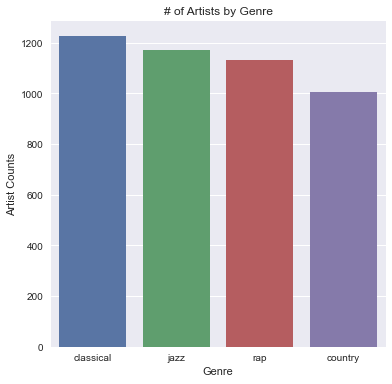

In [36]:
#number of artists per genre

fig, ax = plt.subplots(figsize=(6,6))
sns.barplot(x=genres_df.clean_genres.value_counts().index, y=genres_df.clean_genres.value_counts().values);
ax.set_ylabel('Artist Counts')
ax.set_xlabel('Genre')
ax.set_title('# of Artists by Genre');

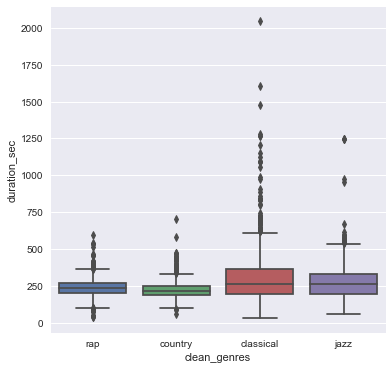

In [37]:
## distribution of duration by each genre

fig, ax = plt.subplots(figsize=(6,6))
sns.boxplot(x=genres_df.clean_genres,y=genres_df.duration_sec);

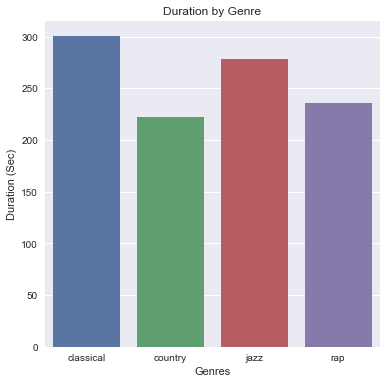

In [38]:
## Mean of duration for each genre
fig, ax = plt.subplots(figsize=(6,6))
sns.barplot(x=genres_df.groupby('clean_genres')['duration_sec'].mean().index, y=genres_df.groupby('clean_genres')['duration_sec'].mean().values);
ax.set_ylabel("Duration (Sec)")
ax.set_xlabel("Genres")
ax.set_title('Duration by Genre');

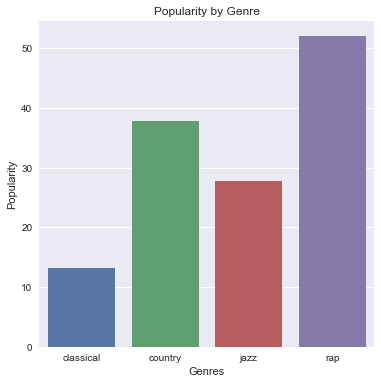

In [39]:
## Median of popularity for each genre
fig, ax = plt.subplots(figsize=(6,6))
sns.barplot(x=genres_df.groupby('clean_genres')['popularity'].median().index, y=genres_df.groupby('clean_genres')['popularity'].median().values);
ax.set_ylabel("Popularity")
ax.set_xlabel("Genres")
ax.set_title('Popularity by Genre');

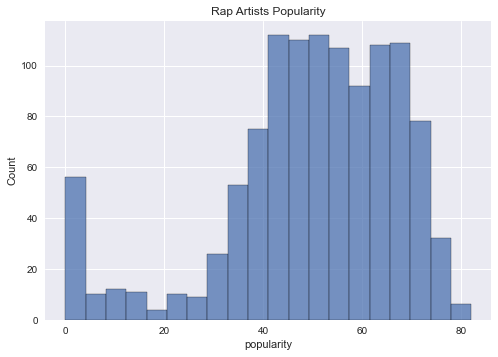

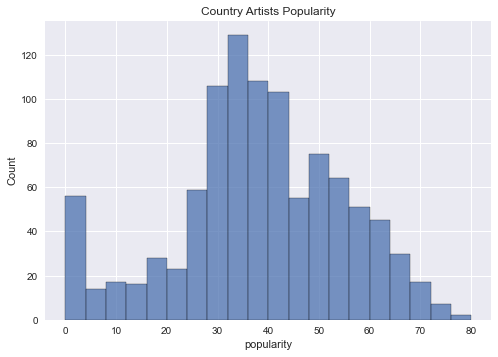

In [40]:
plot1 = plt.figure(1)
sns.histplot(genres_df[genres_df.clean_genres == 'rap'].popularity).set_title("Rap Artists Popularity")

plot2 = plt.figure(2)
sns.histplot(genres_df[genres_df.clean_genres == 'country'].popularity).set_title("Country Artists Popularity")

plt.show()

In [41]:
df['mode'].value_counts().sort_index()

0    1100
1    3435
Name: mode, dtype: int64

In [42]:
## dummy data of keys
genres_df['key'].value_counts().sort_index()

0     451
1     410
2     482
3     160
4     303
5     495
6     255
7     707
8     220
9     401
10    356
11    295
Name: key, dtype: int64

In [43]:
genres_df = pd.get_dummies(data=genres_df,columns=['key'],drop_first=True)

In [44]:
conditons = [genres_df['clean_genres'] == 'rap' ,
             genres_df['clean_genres'] == 'country',
             genres_df['clean_genres'] == 'classical',
             genres_df['clean_genres'] == 'jazz'
]

choices = [0,
           1,
           2,
           3
           
]

genres_df['clean_genres'] = np.select(conditons, choices)

In [45]:
genres_df['clean_genres'].value_counts()

2    1226
3    1172
0    1132
1    1005
Name: clean_genres, dtype: int64

In [46]:
y = genres_df['clean_genres']
artists = genres_df['artists']

In [47]:
#Drops the target value from the X df, and also removes multicollierity columns
X = genres_df.drop(columns = ['genres','clean_genres','rap','country', 'duration_ms','artists'])

In [48]:
X

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,mode,classical,jazz,duration_sec,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,0.458167,0.826667,0.518667,7.108333e-06,0.201683,-8.713167,0.272550,90.728833,0.426750,74.166667,1,0,0,146.89,0,0,0,0,0,0,0,0,0,0,0
1,0.239000,0.883000,0.625000,0.000000e+00,0.076500,-4.098000,0.245000,126.677000,0.871000,69.000000,1,0,0,141.52,0,0,0,0,0,1,0,0,0,0,0
2,0.154637,0.778551,0.625870,2.472048e-02,0.209223,-6.553899,0.149986,117.679087,0.242772,65.333333,1,0,0,149.92,1,0,0,0,0,0,0,0,0,0,0
3,0.144920,0.644600,0.526000,8.000000e-07,0.104660,-9.282200,0.066560,83.897800,0.356800,66.000000,0,0,0,244.53,0,0,1,0,0,0,0,0,0,0,0
4,0.011400,0.696000,0.667000,0.000000e+00,0.181000,-7.665000,0.040700,121.932000,0.287000,62.000000,0,0,0,398.11,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4530,0.611615,0.425692,0.297062,4.252538e-01,0.091523,-13.489231,0.033900,124.615000,0.312800,31.153846,1,0,1,235.32,0,0,0,0,0,0,0,0,1,0,0
4531,0.870000,0.457000,0.115000,8.150000e-01,0.082400,-27.753000,0.061000,92.571000,0.162000,27.000000,1,0,1,395.07,1,0,0,0,0,0,0,0,0,0,0
4532,0.782500,0.463167,0.371000,3.808683e-01,0.163417,-12.028500,0.037417,97.863500,0.265217,42.166667,0,0,2,413.40,0,0,0,0,0,0,1,0,0,0,0
4533,0.085600,0.614000,0.761000,6.180000e-01,0.063000,-14.346000,0.047600,122.889000,0.881000,40.000000,0,0,2,428.43,0,0,0,0,0,0,0,1,0,0,0


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [50]:
dtc = DecisionTreeClassifier(random_state=42)

In [51]:

params_grid = {
    'criterion' : ['gini','entropy'],
    'max_depth':[None, 5,3],
    'min_samples_split':[2,10,20]
}
gridsearch_model = GridSearchCV(estimator=dtc,param_grid = params_grid,verbose=1)

In [52]:
gridsearch_model.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    2.0s finished


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 3],
                         'min_samples_split': [2, 10, 20]},
             verbose=1)

In [53]:
gridsearch_model.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}

In [54]:
best_model = gridsearch_model.best_estimator_

In [55]:
y_pred = best_model.predict(X_test)

In [56]:
y_preds = pd.Series(y_pred)

In [57]:
y_preds.value_counts()

2    317
3    286
0    286
1    245
dtype: int64

In [58]:
f1_score(y_preds,y_test)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].